In [1]:
import mysql.connector
import pandas as pd
from tqdm import tqdm
import os
pd.set_option('display.max_columns', None)


mydb = mysql.connector.connect(
  host="reps-ods-cluster-1.cluster-ro-curqk9xgnt28.us-east-2.rds.amazonaws.com",
  port='3306',
  database ='lobsang',
  user="jaybhatt",
  password="72QmYetSNfGM"
)

In [2]:
## Getting Distinct vanue names from lobsang
get_sales_query = '''SELECT Date_add(l.datetime, interval -8 hour) "selling_date",
       e.id "event_id",
       l.org_id,
       l.parent_id "listing_id",
       t.foreign_id "ticket_id",
       Date_add(e.datetime, interval -8 hour) as "event_datetime",
       Date_add(e.onsale, interval -8 hour) as "onsale_datetime",
	   sg.name "event_type",
	   g.name "genre",
	   l.type "trans_type",
	   v.name "venue",
	   v.city "city",
	   v.state "state",
	   e.name "event_name",
	   p.name "performer",
       t.section AS "section",
       t.row AS "row",
       t.seat AS "seat",
       	   	l.amount /
	(
	select Count(*)
	from lobsang.ticket t
	where t.invoice_line_id = l.id
	) "sell_amt"
       , SB.active_inventory_tags
       , l.cancelled
FROM lobsang.line l
INNER JOIN lobsang.event_link el ON el.foreign_id = l.foreign_event_id AND el.type = 2
INNER JOIN lobsang.event e ON e.id = el.lobsang_id
INNER JOIN lobsang.ticket t ON t.invoice_line_id = l.id
INNER JOIN lobsang.skybox_datamart SB ON SB.event_id = e.id
INNER JOIN lobsang.performer p ON p.id = e.performer_id
INNER JOIN lobsang.genre g ON g.id = p.genre_id
INNER JOIN lobsang.subgenre sg ON sg.id = g.genre_id
INNER JOIN lobsang.venue v ON v.id = e.venue
WHERE l.type = 'invoice' and e.id = 3787028
GROUP BY
        Date_add(l.datetime, interval -8 hour),
       e.id,
       l.org_id,
         l.parent_id,
       t.foreign_id,
       Date_add(e.datetime, interval -8 hour),
       Date_add(e.onsale, interval -8 hour),
       sg.name,
       g.name,
       l.type,
       v.name,
       v.city,
       v.state,
       e.name,
       p.name,
       t.section,
       t.row,
       t.seat,
       l.amount,
       SB.active_inventory_tags,
       l.cancelled'''

sold_df = pd.read_sql(get_sales_query, con=mydb)
sold_df.head(5)

,selling_date,event_id,org_id,listing_id,ticket_id,event_datetime,onsale_datetime,event_type,genre,trans_type,venue,city,state,event_name,performer,section,row,seat,sell_amt,active_inventory_tags,cancelled
0,2022-04-20 08:44:57,3787028,1,2496665,897647637,2022-05-06 19:00:00,2022-02-11 10:00:00,Music,Rap/Hip Hop,invoice,Belasco Theater Los Angeles,Los Angeles,CA,Key Glock,Key Glock,GA2,GA5,48,57.22,"pc,jasongnibus,rubs,refund-hold,ticketmaster,c...",0
1,2022-04-20 12:32:42,3787028,1,2497368,897647633,2022-05-06 19:00:00,2022-02-11 10:00:00,Music,Rap/Hip Hop,invoice,Belasco Theater Los Angeles,Los Angeles,CA,Key Glock,Key Glock,GA2,GA5,44,57.22,"pc,jasongnibus,rubs,refund-hold,ticketmaster,c...",0
2,2022-04-20 12:32:42,3787028,1,2497368,897647634,2022-05-06 19:00:00,2022-02-11 10:00:00,Music,Rap/Hip Hop,invoice,Belasco Theater Los Angeles,Los Angeles,CA,Key Glock,Key Glock,GA2,GA5,45,57.22,"pc,jasongnibus,rubs,refund-hold,ticketmaster,c...",0
3,2022-04-20 12:32:42,3787028,1,2497368,897647635,2022-05-06 19:00:00,2022-02-11 10:00:00,Music,Rap/Hip Hop,invoice,Belasco Theater Los Angeles,Los Angeles,CA,Key Glock,Key Glock,GA2,GA5,46,57.22,"pc,jasongnibus,rubs,refund-hold,ticketmaster,c...",0
4,2022-04-20 12:32:42,3787028,1,2497368,897647636,2022-05-06 19:00:00,2022-02-11 10:00:00,Music,Rap/Hip Hop,invoice,Belasco Theater Los Angeles,Los Angeles,CA,Key Glock,Key Glock,GA2,GA5,47,57.22,"pc,jasongnibus,rubs,refund-hold,ticketmaster,c...",0


In [3]:
## Getting Distinct vanue names from lobsang
get_purchage_query = '''SELECT Date_add(l.datetime, interval -8 hour) "purchase_date",
       e.id "event_id",
       l.org_id,
       l.parent_id "listing_id",
       t.foreign_id "ticket_id",
       Date_add(e.datetime, interval -8 hour) as "event_datetime",
       Date_add(e.onsale, interval -8 hour) as "onsale_datetime",
	   sg.name "event_type",
	   g.name "genre",
	   l.type "trans_type",
	   v.name "venue",
	   v.city "city",
	   v.state "state",
	   e.name "event_name",
	   p.name "performer",
       t.section AS "section",
       t.row AS "row",
       t.seat AS "seat",
       	   	l.amount /
	(
	select Count(*)
	from lobsang.ticket t
	where t.invoice_line_id = l.id
	) "purchase_amt"
       , SB.active_inventory_tags
       , l.cancelled
FROM lobsang.line l
INNER JOIN lobsang.event_link el ON el.foreign_id = l.foreign_event_id AND el.type = 2
INNER JOIN lobsang.event e ON e.id = el.lobsang_id
INNER JOIN lobsang.ticket t ON t.invoice_line_id = l.id
INNER JOIN lobsang.skybox_datamart SB ON SB.event_id = e.id
INNER JOIN lobsang.performer p ON p.id = e.performer_id
INNER JOIN lobsang.genre g ON g.id = p.genre_id
INNER JOIN lobsang.subgenre sg ON sg.id = g.genre_id
INNER JOIN lobsang.venue v ON v.id = e.venue
WHERE l.type = 'invoice' and e.id = 3787028
GROUP BY
        Date_add(l.datetime, interval -8 hour),
       e.id,
       l.org_id,
         l.parent_id,
       t.foreign_id,
       Date_add(e.datetime, interval -8 hour),
       Date_add(e.onsale, interval -8 hour),
       sg.name,
       g.name,
       l.type,
       v.name,
       v.city,
       v.state,
       e.name,
       p.name,
       t.section,
       t.row,
       t.seat,
       l.amount,
       SB.active_inventory_tags,
       l.cancelled'''

purchage_df = pd.read_sql(get_purchage_query, con=mydb)
purchage_df.head(5)

,purchase_date,event_id,org_id,listing_id,ticket_id,event_datetime,onsale_datetime,event_type,genre,trans_type,venue,city,state,event_name,performer,section,row,seat,purchase_amt,active_inventory_tags,cancelled
0,2022-04-20 08:44:57,3787028,1,2496665,897647637,2022-05-06 19:00:00,2022-02-11 10:00:00,Music,Rap/Hip Hop,invoice,Belasco Theater Los Angeles,Los Angeles,CA,Key Glock,Key Glock,GA2,GA5,48,57.22,"pc,jasongnibus,rubs,refund-hold,ticketmaster,c...",0
1,2022-04-20 12:32:42,3787028,1,2497368,897647633,2022-05-06 19:00:00,2022-02-11 10:00:00,Music,Rap/Hip Hop,invoice,Belasco Theater Los Angeles,Los Angeles,CA,Key Glock,Key Glock,GA2,GA5,44,57.22,"pc,jasongnibus,rubs,refund-hold,ticketmaster,c...",0
2,2022-04-20 12:32:42,3787028,1,2497368,897647634,2022-05-06 19:00:00,2022-02-11 10:00:00,Music,Rap/Hip Hop,invoice,Belasco Theater Los Angeles,Los Angeles,CA,Key Glock,Key Glock,GA2,GA5,45,57.22,"pc,jasongnibus,rubs,refund-hold,ticketmaster,c...",0
3,2022-04-20 12:32:42,3787028,1,2497368,897647635,2022-05-06 19:00:00,2022-02-11 10:00:00,Music,Rap/Hip Hop,invoice,Belasco Theater Los Angeles,Los Angeles,CA,Key Glock,Key Glock,GA2,GA5,46,57.22,"pc,jasongnibus,rubs,refund-hold,ticketmaster,c...",0
4,2022-04-20 12:32:42,3787028,1,2497368,897647636,2022-05-06 19:00:00,2022-02-11 10:00:00,Music,Rap/Hip Hop,invoice,Belasco Theater Los Angeles,Los Angeles,CA,Key Glock,Key Glock,GA2,GA5,47,57.22,"pc,jasongnibus,rubs,refund-hold,ticketmaster,c...",0


In [4]:
len(purchage_df.seat.unique())

49

In [5]:
len(sold_df['seat'].unique())

49

In [6]:
sold_df['date']= sold_df.selling_date.dt.date

In [7]:
test_df = sold_df.merge(purchage_df[['ticket_id','purchase_amt','seat']],on= 'seat')
test_df.head()

,selling_date,event_id,org_id,listing_id,ticket_id_x,event_datetime,onsale_datetime,event_type,genre,trans_type,venue,city,state,event_name,performer,section,row,seat,sell_amt,active_inventory_tags,cancelled,date,ticket_id_y,purchase_amt
0,2022-04-20 08:44:57,3787028,1,2496665,897647637,2022-05-06 19:00:00,2022-02-11 10:00:00,Music,Rap/Hip Hop,invoice,Belasco Theater Los Angeles,Los Angeles,CA,Key Glock,Key Glock,GA2,GA5,48,57.22,"pc,jasongnibus,rubs,refund-hold,ticketmaster,c...",0,2022-04-20,897647637,57.22
1,2022-04-20 08:44:57,3787028,1,2496665,897647637,2022-05-06 19:00:00,2022-02-11 10:00:00,Music,Rap/Hip Hop,invoice,Belasco Theater Los Angeles,Los Angeles,CA,Key Glock,Key Glock,GA2,GA5,48,57.22,"pc,jasongnibus,rubs,refund-hold,ticketmaster,c...",0,2022-04-20,897648326,60.76
2,2022-04-20 08:44:57,3787028,1,2496665,897647637,2022-05-06 19:00:00,2022-02-11 10:00:00,Music,Rap/Hip Hop,invoice,Belasco Theater Los Angeles,Los Angeles,CA,Key Glock,Key Glock,GA2,GA5,48,57.22,"pc,jasongnibus,rubs,refund-hold,ticketmaster,c...",0,2022-04-20,897659564,75.66
3,2022-04-23 15:59:32,3787028,1,2508720,897648326,2022-05-06 19:00:00,2022-02-11 10:00:00,Music,Rap/Hip Hop,invoice,Belasco Theater Los Angeles,Los Angeles,CA,Key Glock,Key Glock,GA2,GA6,48,60.76,"pc,jasongnibus,rubs,refund-hold,ticketmaster,c...",0,2022-04-23,897647637,57.22
4,2022-04-23 15:59:32,3787028,1,2508720,897648326,2022-05-06 19:00:00,2022-02-11 10:00:00,Music,Rap/Hip Hop,invoice,Belasco Theater Los Angeles,Los Angeles,CA,Key Glock,Key Glock,GA2,GA6,48,60.76,"pc,jasongnibus,rubs,refund-hold,ticketmaster,c...",0,2022-04-23,897648326,60.76


In [8]:
event_date = test_df.event_datetime.dt.date[0]
event_date

datetime.date(2022, 5, 6)

In [9]:
test_df[['date','event_id','section','row','seat','sell_amt','purchase_amt']]

,date,event_id,section,row,seat,sell_amt,purchase_amt
0,2022-04-20,3787028,GA2,GA5,48,57.22,57.22
1,2022-04-20,3787028,GA2,GA5,48,57.22,60.76
2,2022-04-20,3787028,GA2,GA5,48,57.22,75.66
3,2022-04-23,3787028,GA2,GA6,48,60.76,57.22
4,2022-04-23,3787028,GA2,GA6,48,60.76,60.76
...,...,...,...,...,...,...,...
267,2022-05-03,3787028,GA3,GA7,17,50.42,28.13
268,2022-05-03,3787028,GA3,GA7,17,50.42,38.94
269,2022-05-03,3787028,GA3,GA7,17,50.42,49.92
270,2022-05-03,3787028,GA3,GA7,17,50.42,50.42


In [10]:
f_df = test_df.groupby('date').count()[['event_id']].join(test_df.groupby('date').mean()[['sell_amt','purchase_amt']])

In [11]:
f_df = f_df.rename(columns ={'event_id':'no tickets sol'})

In [12]:
f_df['Ratio'] = f_df['sell_amt']/f_df['purchase_amt']

In [13]:
f_df['no tickets sol * Ratio']= f_df['no tickets sol']*f_df['Ratio']

In [14]:
f_df['norm_ratio'] = f_df['no tickets sol * Ratio']/f_df['no tickets sol * Ratio'].sum()

In [15]:
f_df['norm_ratio_cum_sum'] = f_df['norm_ratio'].cumsum()

In [16]:
f_df['norm_ratio*1000'] = f_df['norm_ratio']*1000

In [17]:
f_df['no tickets sol_cumsum'] = f_df['no tickets sol'].cumsum()

In [18]:
f_df['actual_cumsum_ratio']=f_df['no tickets sol_cumsum']/f_df['no tickets sol'].sum()

<AxesSubplot:xlabel='date'>

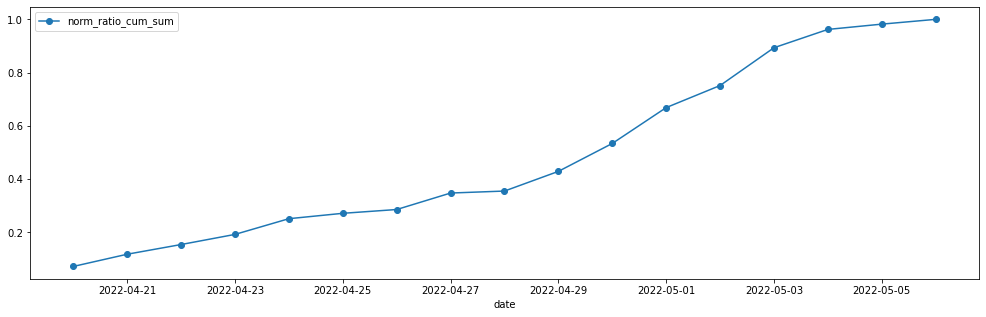

In [19]:
f_df[['norm_ratio_cum_sum']].plot(figsize=(17,5),marker = 'o')

In [20]:
f_df.to_csv("analysis.csv")

In [21]:
f_df['DTE'] = f_df.index-event_date 

<AxesSubplot:xlabel='DTE'>

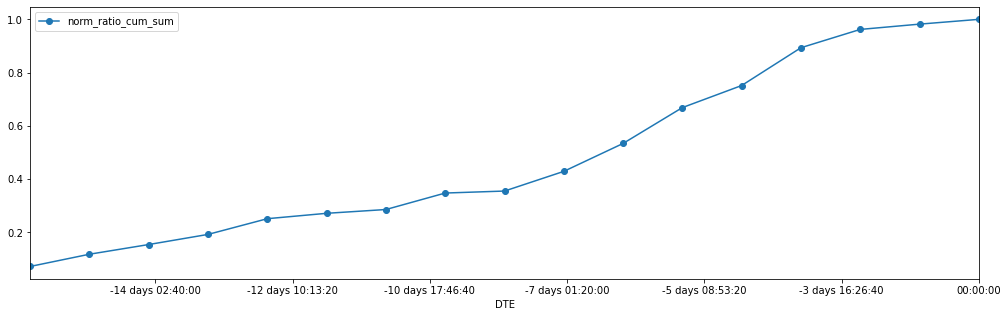

In [22]:
f_df.set_index('DTE')[['norm_ratio_cum_sum']].plot(figsize=(17,5),marker = 'o')

<AxesSubplot:xlabel='DTE'>

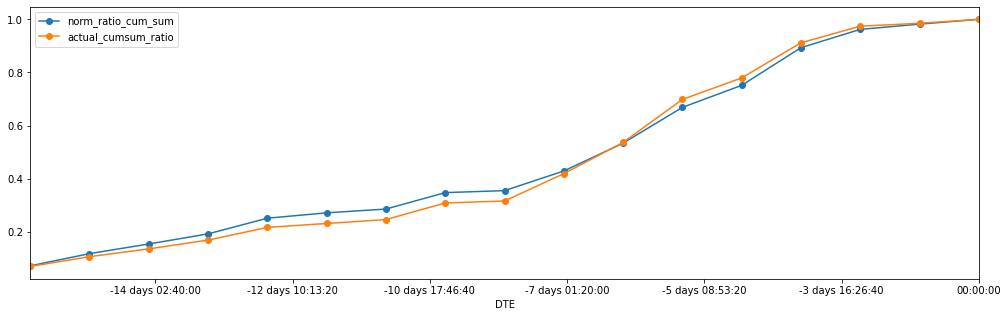

In [23]:
f_df.set_index('DTE')[['norm_ratio_cum_sum','actual_cumsum_ratio']].plot(figsize=(17,5),marker = 'o')

In [24]:
f_df.to_csv("event_data_3787028.csv")